Determine the observable time of the Canopus on 2018-9-23 (Autumnal equinox).

Note: The proper motion of the Canopus was not considered.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
hip30438 = SkyCoord.from_name("HIP 30438")

In [4]:
taishan = EarthLocation(lat=36.2*u.deg, lon=117.1*u.deg, height=1500*u.m)
utcoffset = +8 * u.hour  # Daylight Time
midnight = Time("2018-9-23 00:00:00") - utcoffset

In [5]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_Sep22_to_23 = midnight + delta_midnight
frame_Sep22_to_23 = AltAz(obstime=times_Sep22_to_23, location=taishan)
sunaltazs_Sep22_to_23 = get_sun(times_Sep22_to_23).transform_to(frame_Sep22_to_23)

In [6]:
from astropy.coordinates import get_moon
moon_Sep22_to_23 = get_moon(times_Sep22_to_23)
moonaltazs_Sep22_to_23 = moon_Sep22_to_23.transform_to(frame_Sep22_to_23)

In [7]:
hip30438altazs_Sep22_to_23 = hip30438.transform_to(frame_Sep22_to_23)

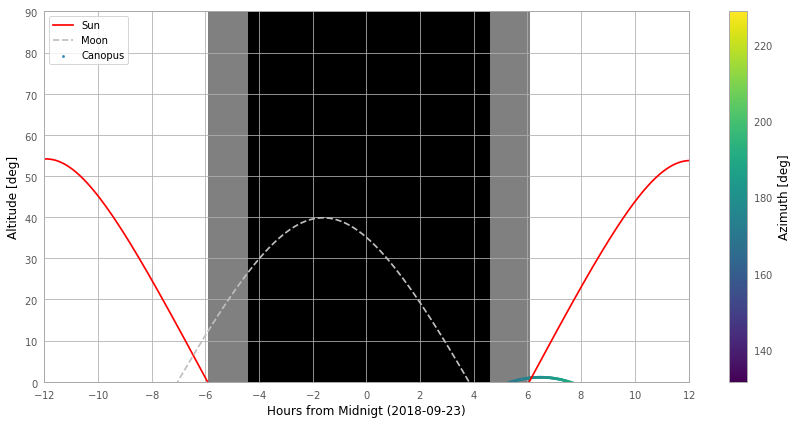

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(delta_midnight, sunaltazs_Sep22_to_23.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs_Sep22_to_23.alt,
         color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_midnight, hip30438altazs_Sep22_to_23.alt,
            c=hip30438altazs_Sep22_to_23.az, label='Canopus', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_Sep22_to_23.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_Sep22_to_23.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(-12, 13, 2))
plt.ylim(0, 90)
plt.xlabel('Hours from Midnigt (2018-09-23)')
plt.ylabel('Altitude [deg]')

plt.tight_layout()
# plt.savefig("2018-09-23.png", dpi=100)
plt.savefig("2018-09-23.eps", dpi=100)